# Elastic Net = L1 (Lasso) + L2 (Ridge) Regularization

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('diabetes.csv')

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

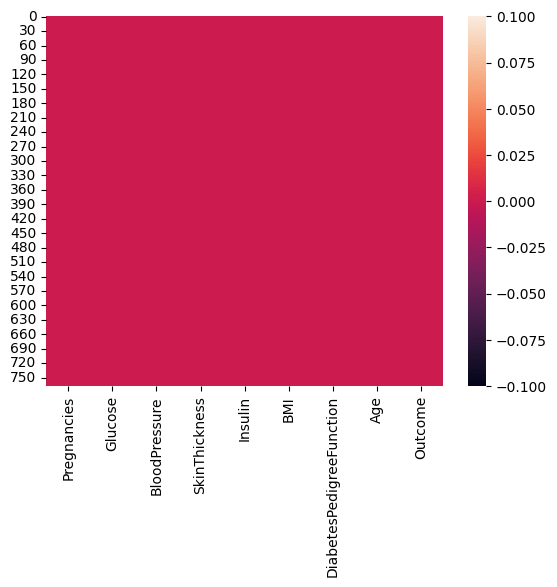

In [24]:
sns.heatmap(df.isnull())

In [25]:
X = df.drop(['Outcome'], axis=1)
y = df["Outcome"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
en = ElasticNet()

In [29]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
encv = GridSearchCV(en, parameters, scoring = 'neg_mean_squared_error', cv = 5)

In [30]:
encv.fit(X_train, y_train)

/Users/devayushrout/Desktop/ Regression Models/myenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e+01, tolerance: 1.129e-02
  model = cd_fast.enet_coordinate_descent(
/Users/devayushrout/Desktop/ Regression Models/myenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.819e+01, tolerance: 1.126e-02
  model = cd_fast.enet_coordinate_descent(
/Users/devayushrout/Desktop/ Regression Models/myenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [31]:
print(encv.best_params_)

{'alpha': 0.001}


In [32]:
print(encv.best_score_)

-0.16555182295378887


In [33]:
y_pred = encv.predict(X_test)
y_pred

array([ 1.02267251,  0.21301036,  0.10352984,  0.60369078,  0.1687904 ,
       -0.05370149,  0.67328359,  0.79027495,  0.41583101,  0.3974738 ,
        0.54549519,  1.02678679,  0.350565  ,  0.22669191,  0.15602777,
        0.21662712,  0.81254686, -0.10745844,  0.45321028,  0.30846695,
        0.6028108 ,  0.42212325,  0.29083946,  0.031937  ,  0.00418835,
        0.39401147, -0.00918127,  0.87319323,  0.15186126,  0.19842769,
        0.47949887,  0.29548543,  0.10735979,  0.46186969,  0.13812176,
        0.66011005,  0.4709569 ,  0.09586129,  0.37960112,  0.68196297,
        0.3315044 ,  0.25762086,  0.21893842,  0.76824201,  0.69172775,
       -0.27517429,  0.10059729,  0.27237315,  0.38715957,  0.34953933,
        0.43962517,  0.24858848,  0.81668765,  0.49150676,  0.169551  ,
       -0.51042767,  0.03641168,  0.50184494,  0.33604067,  0.1153003 ,
        0.65390401,  0.47082077,  0.14668819,  0.66399327,  0.63910364,
        0.89360064,  0.66255314,  0.20240797,  0.40303933,  0.13

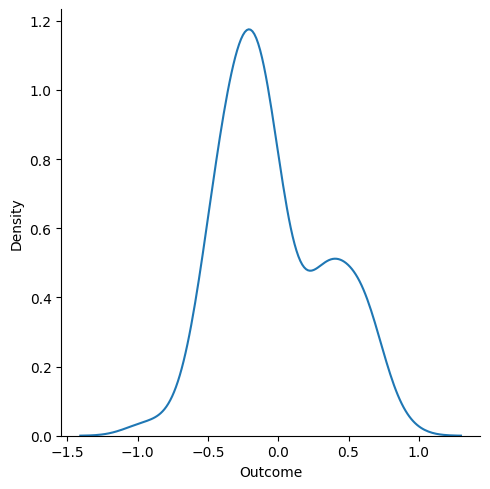

In [34]:
sns.displot(y_test-y_pred, kind='kde')